In [164]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

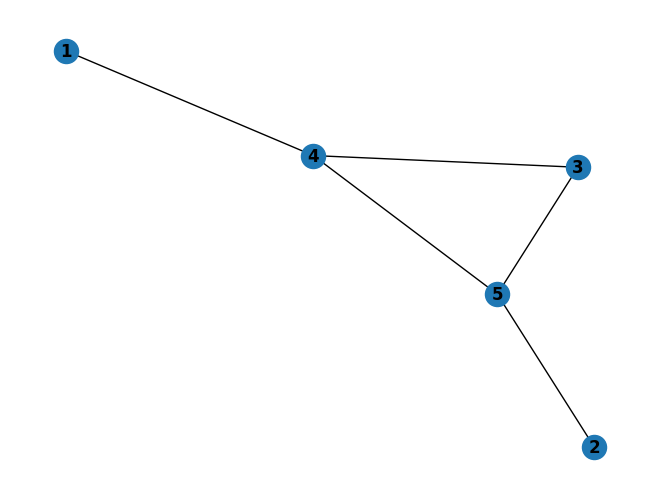

In [165]:
# Create an empty undirected graph
graph_undir = nx.Graph()

# Add nodes to the graph
graph_undir.add_nodes_from([1, 2, 3, 4, 5])

# Add edges to the graph
graph_undir.add_edges_from([(1, 4), (2, 5), (3, 4), (4, 5), (3, 5)])

# Visualize the graph
nx.draw(graph_undir, with_labels=True, font_weight='bold')
plt.show()

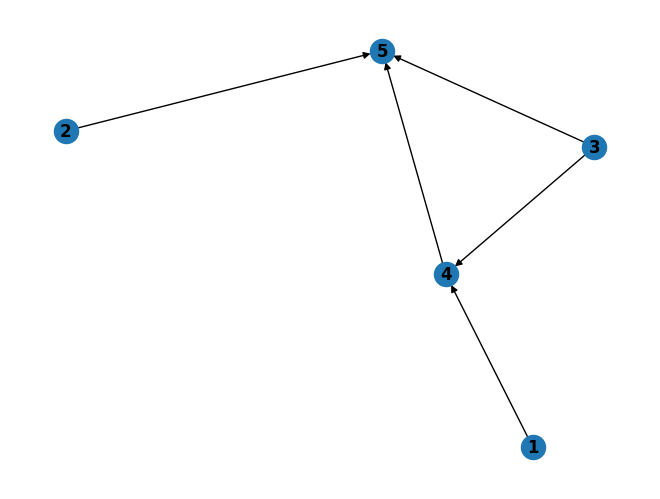

In [166]:
# Create an empty directed graph
graph_dir = nx.DiGraph()

# Add nodes to the graph
graph_dir.add_nodes_from([1, 2, 3, 4, 5])

# Add edges to the graph
graph_dir.add_edges_from([(1, 4), (2, 5), (3, 4), (4, 5), (3, 5)])

# Visualize the graph
nx.draw(graph_dir, with_labels=True, font_weight='bold')
plt.show()

In [167]:
# Create adjacency matrix
adj_dir = nx.adjacency_matrix(graph_dir)
adj_undir = nx.adjacency_matrix(graph_undir)

# Visualise adjacency matrix
print("A_d =", adj_dir.todense())
print("A_u =", adj_undir.todense())

A_d = [[0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
A_u = [[0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [1 0 1 0 1]
 [0 1 1 1 0]]


In [168]:
# Compute transposed adjacency matrix
adj_dir_t =  adj_dir.transpose() 
adj_undir_t =  adj_undir.transpose() 

# Visualise adjacency matrix
print("A_d^T =", adj_dir_t.todense())
print("A_u^T =", adj_undir_t.todense())

A_d^T = [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 1 0 0]
 [0 1 1 1 0]]
A_u^T = [[0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [1 0 1 0 1]
 [0 1 1 1 0]]


In [169]:
#Check if the two matrices are identical
check_dir = np.all(adj_dir_t == adj_dir)
check_undir = np.all(adj_undir_t == adj_undir)

# Print of the check
print(check_dir.todense())
print(check_undir.todense())

[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True False False]
 [False  True False  True False]
 [ True False False False  True]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


C:\Users\zandi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3577: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [170]:
# Create laplacian matrix
lap_undir = nx.laplacian_matrix(graph_undir)

# Visualise lapldacial matrix
print("L_u =", lap_undir.todense())

L_u = [[ 1  0  0 -1  0]
 [ 0  1  0  0 -1]
 [ 0  0  2 -1 -1]
 [-1  0 -1  3 -1]
 [ 0 -1 -1 -1  3]]


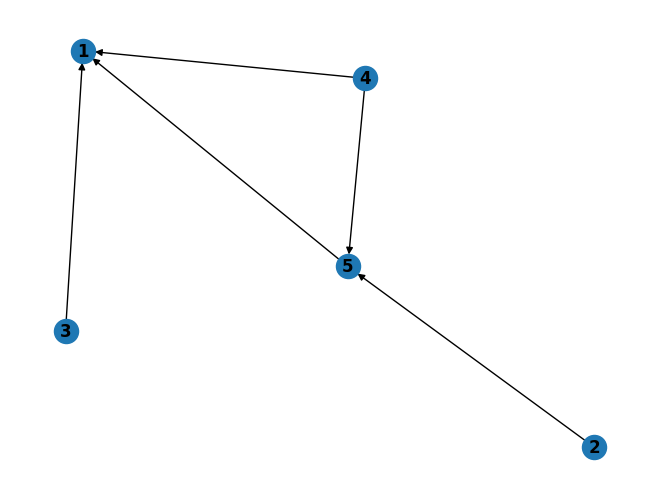

In [171]:
# Relabel of the vertices
mapping = {1: 2, 2: 3, 3: 4, 4: 5, 5: 1}
graph_dir_perm = nx.relabel_nodes(graph_dir, mapping)

# Visualize the graph
nx.draw(graph_dir_perm, with_labels=True, font_weight='bold')
plt.show()

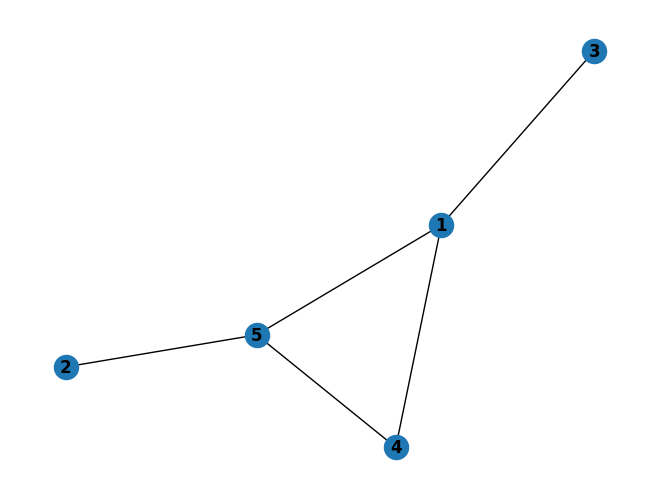

In [172]:
# Relabel of the vertices
mapping = {1: 2, 2: 3, 3: 4, 4: 5 , 5: 1}
graph_undir_perm = nx.relabel_nodes(graph_undir, mapping)

# Visualize the graph
nx.draw(graph_undir_perm, with_labels=True, font_weight='bold')
plt.show()

In [173]:
adj_dir_per = nx.adjacency_matrix(graph_dir_perm)
adj_undir_per = nx.adjacency_matrix(graph_undir_perm)

In [174]:
perm = np.array([[ 0,  1,  0, 0,  0],
 [ 0,  0,  1,  0, 0],
 [ 0,  0,  0, 1, 0],
 [0,  0, 0,  0, 1],
 [ 1, 0, 0, 0, 0]])

solution_dir = perm * adj_dir
solution_dir = solution_dir * perm.transpose()

solution_undir = perm * adj_undir
solution_undir = solution_undir * perm.transpose()

In [175]:
#Check if the two matrices are identical
check_dir_p = np.all(solution_dir == adj_dir_per)
check_undir_p = np.all(solution_undir == adj_undir_per)

# Print of the check
print(check_dir_p.todense())
print(check_undir_p.todense())

[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True False False]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True False False]
 [False  True False  True False]
 [ True False False False  True]]


C:\Users\zandi\AppData\Local\Temp\ipykernel_8452\947873129.py:2: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  check_dir_p = np.all(solution_dir == adj_dir_per)
C:\Users\zandi\AppData\Local\Temp\ipykernel_8452\947873129.py:3: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  check_undir_p = np.all(solution_undir == adj_undir_per)
